In [133]:
import os, json, re
from glob import glob

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
%matplotlib inline

In [136]:
logfiles = glob('paperscrape3/*.log')

In [137]:
logfiles.sort()

In [138]:
p = re.compile(r'writing (\d+) records to (.*)\n.*total time: (.*)\W', re.DOTALL)
p_query = re.compile(r"making query (\d+)", re.MULTILINE)
# p = re.compile(r'making query (\d*) with args: .* writing', re.DOTALL)

In [139]:
def get_log_data(fname):
    with open(fname, 'r') as f:
        txt = f.read()
        m = p.search(txt)
        m_query = p_query.findall(txt)
        if not m or not m_query:
            return None
        d = {
            'num_records': int(m.group(1)),
            'json_fname': m.group(2),
            'total_time': m.group(3),
            'num_queries': int(m_query[-1])
        }
        return d
        

In [140]:
d = {}
for fname in logfiles:
    this_logdata = get_log_data(fname)
    if this_logdata:
        d[fname] = this_logdata

In [141]:
d

{'paperscrape3/papers1960.log': {'json_fname': '/home/jporteno/code/maka/paperscrape3/papers-1960.json',
  'num_queries': 400,
  'num_records': 398436,
  'total_time': '11 minutes and 29.92 seconds'},
 'paperscrape3/papers1961.log': {'json_fname': '/home/jporteno/code/maka/paperscrape3/papers-1961.json',
  'num_queries': 394,
  'num_records': 392557,
  'total_time': '11 minutes and 50.45 seconds'},
 'paperscrape3/papers1962.log': {'json_fname': '/home/jporteno/code/maka/paperscrape3/papers-1962.json',
  'num_queries': 422,
  'num_records': 420863,
  'total_time': '12 minutes and 12.47 seconds'},
 'paperscrape3/papers1963.log': {'json_fname': '/home/jporteno/code/maka/paperscrape3/papers-1963.json',
  'num_queries': 450,
  'num_records': 448178,
  'total_time': '13 minutes and 17.06 seconds'},
 'paperscrape3/papers1964.log': {'json_fname': '/home/jporteno/code/maka/paperscrape3/papers-1964.json',
  'num_queries': 484,
  'num_records': 482597,
  'total_time': '14 minutes and 26.69 second

In [142]:
df = pd.DataFrame.from_dict(d, orient='index')

In [143]:
df['logfname'] = df.index
def extract_year(x):
    b = os.path.basename(x)
    b = os.path.splitext(b)[0]
    return int(b.replace('papers',''))
df['year'] = df.logfname.apply(extract_year)

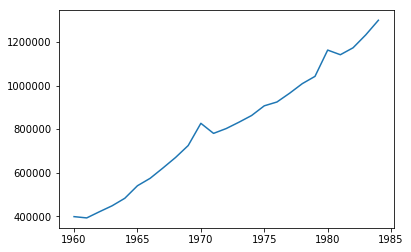

In [144]:
plt.plot(df.year, df.num_records)

<Container object of 25 artists>

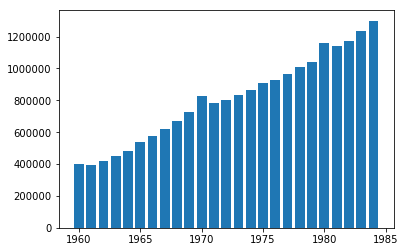

In [145]:
plt.bar(df.year, df.num_records)

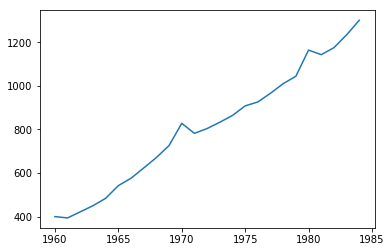

In [146]:
plt.plot(df.year, df.num_queries)